In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

/home/anirudh/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
from pprint import *

In [3]:
import seaborn
seaborn.set()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Hypotheses

1. Age
2. Income
3. Profession
4. Marital Status
5. Urban / Rural
6. Expenses
7. Education
8. Total Work Experience

In [5]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30,United-States


In [6]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Univariate Analysis

### Preprocessing Categorical Variables

***Age***

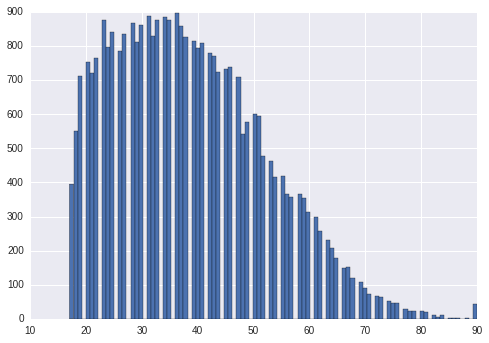

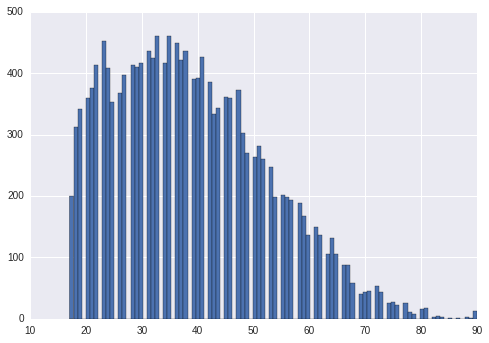

In [7]:
plt.hist(train.Age, bins = 100)
plt.show()
plt.hist(test.Age, bins = 100)
plt.show()

In [8]:
train.Age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [9]:
test.Age.describe()

count    16281.000000
mean        38.767459
std         13.849187
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

*** 25% of the population is between 17 and 28***

*** 25% of the population is between 28 and 37***

*** 75% of the population is under 48 ***

-------------------------------------------

*** Working Class ***

In [10]:
train.Workclass.describe()

count       30725
unique          8
top       Private
freq        22696
Name: Workclass, dtype: object

In [11]:
test.Workclass.describe()

count       15318
unique          8
top       Private
freq        11210
Name: Workclass, dtype: object

In [12]:
unique_working_classes = list(train.Workclass.unique())
unique_working_classes

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 nan,
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
number = LabelEncoder()
train.Workclass = number.fit_transform(train.Workclass.astype('str'))
test.Workclass = number.fit_transform(test.Workclass.astype('str'))

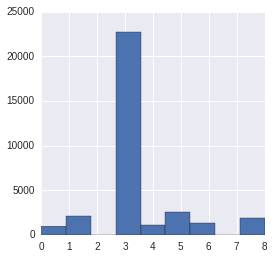

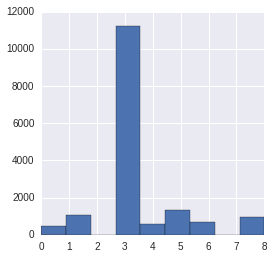

In [15]:
fig = plt.figure(figsize=(4,4), dpi=1600)
plt.hist(train.Workclass, bins = len(unique_working_classes))
plt.show()

fig = plt.figure(figsize=(4,4), dpi=1600)
plt.hist(test.Workclass, bins = len(unique_working_classes))
plt.show()

In [16]:
train.Workclass.unique()

array([6, 5, 3, 0, 1, 8, 4, 7, 2])

In [17]:
# Workclass Decoder

workclass_decoder = dict(zip(train.Workclass.unique(),unique_working_classes))
workclass_decoder

{0: 'Federal-gov',
 1: 'Local-gov',
 2: 'Never-worked',
 3: 'Private',
 4: 'Self-emp-inc',
 5: 'Self-emp-not-inc',
 6: 'State-gov',
 7: 'Without-pay',
 8: nan}

In [18]:
# Combine bins based on some common sense
new_workclass_encoder = {0:0,1:0,2:1,3:2,4:3,5:3,6:0,7:1,8:1}

new_workclass_train = [new_workclass_encoder[i] for i in train.Workclass]
train.Workclass = new_workclass_train

new_workclass_test = [new_workclass_encoder[i] for i in test.Workclass]
test.Workclass = new_workclass_test

new_workclass_decoder = {0:'Government',1:'Never Worked / Without Pay / Information NA', 2:'Private'}

In [19]:
new_workclass_decoder

{0: 'Government',
 1: 'Never Worked / Without Pay / Information NA',
 2: 'Private'}

(array([  2198.,    973.,  13110.]),
 array([ 0.,  1.,  2.,  3.]),
 <a list of 3 Patch objects>)

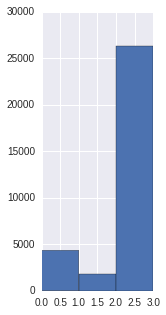

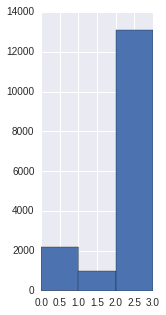

In [20]:
fig = plt.figure(figsize=(2,5), dpi=1600)
plt.hist(train.Workclass, bins = 3)

fig = plt.figure(figsize=(2,5), dpi=1600)
plt.hist(test.Workclass, bins = 3)

*** Education ***

In [21]:
education_levels_train = train.Education.unique()
print education_levels_train

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th' '1st-4th'
 'Preschool' '12th']


{'10th': 0,
 '11th': 1,
 '12th': 2,
 '1st-4th': 3,
 '5th-6th': 4,
 '7th-8th': 5,
 '9th': 6,
 'Assoc-acdm': 7,
 'Assoc-voc': 8,
 'Bachelors': 9,
 'Doctorate': 10,
 'HS-grad': 11,
 'Masters': 12,
 'Preschool': 13,
 'Prof-school': 14,
 'Some-college': 15}


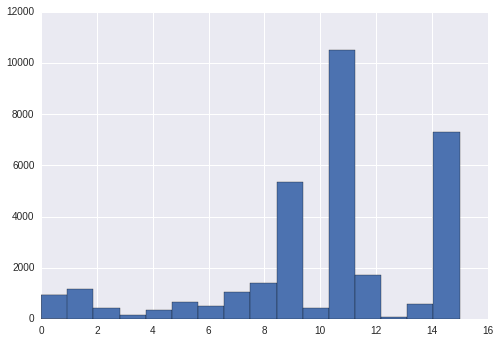

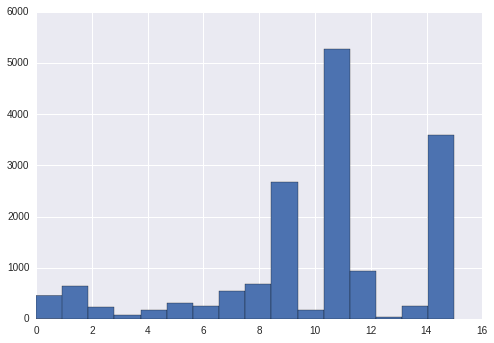

In [22]:
train.Education = number.fit_transform(train.Education)
new_education_levels = train.Education.unique()
education_levels_decoder = dict(zip(education_levels_train, new_education_levels))
pprint(education_levels_decoder)
plt.hist(train.Education, bins = len(new_education_levels))
plt.show()

test.Education = number.fit_transform(test.Education)
plt.hist(test.Education, bins = len(new_education_levels))
plt.show()

...it would make sense to club bins in a more sensible way

In [23]:
pprint(education_levels_decoder)

{'10th': 0,
 '11th': 1,
 '12th': 2,
 '1st-4th': 3,
 '5th-6th': 4,
 '7th-8th': 5,
 '9th': 6,
 'Assoc-acdm': 7,
 'Assoc-voc': 8,
 'Bachelors': 9,
 'Doctorate': 10,
 'HS-grad': 11,
 'Masters': 12,
 'Preschool': 13,
 'Prof-school': 14,
 'Some-college': 15}


In [24]:
new_education_levels_encoder = {0:1,1:1,2:2,3:0,4:0,5:0,6:0, 7:5, 8:5, 9:3, 10:7, 11:2, 12:4, 13:0, 14:6, 15:3}

new_education_levels_train = [new_education_levels_encoder[i] for i in train.Education]
train.Education = new_education_levels_train

new_education_levels_test = [new_education_levels_encoder[i] for i in test.Education]
test.Education = new_education_levels_test

new_education_levels_decoder = {0:'< 9th', 1:'High School', 2:'High School Grad', 3:'Bachelors', 4:'Masters', 5:'Assoc-acdm / Assoc-voc', 6:'Prof School', 7:'Doctorate'}

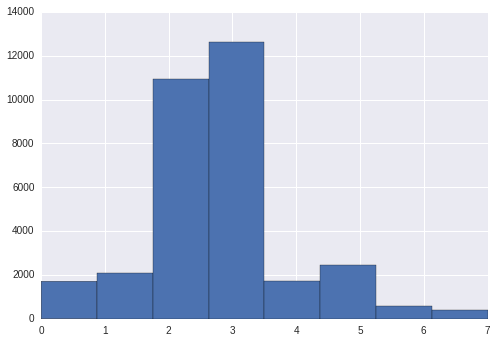

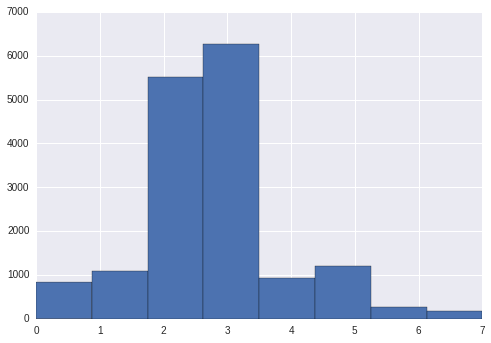

In [25]:
plt.hist(train.Education, bins = len(new_education_levels_decoder))
plt.show()
plt.hist(test.Education, bins = len(new_education_levels_decoder))
plt.show()

#### Income Group

In [26]:
# Rows for which Income is under $50k
print train[train['Income.Group'] != '<=50K'].index

Int64Index([    7,     8,     9,    10,    11,    14,    19,    20,    25,
               27,
            ...
            32530, 32532, 32533, 32536, 32538, 32539, 32545, 32554, 32557,
            32560],
           dtype='int64', length=7841)


In [27]:
temp = [0]*len(train)
for i in train[train['Income.Group'] != '<=50K'].index:
    temp[i] = 1
train['Income.Group'] = temp

In [28]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,0,3,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,2,50,3,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,3,38,2,2,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,4,53,2,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,5,28,2,3,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [29]:
train.describe()

,ID,Age,Workclass,Education,Hours.Per.Week,Income.Group
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.788029,2.684131,40.437456,0.240810
std,9399.695394,13.640433,0.811749,1.297752,12.347429,0.427581
min,1.000000,17.000000,0.000000,0.000000,1.000000,0.000000
25%,8141.000000,28.000000,2.000000,2.000000,40.000000,0.000000
50%,16281.000000,37.000000,2.000000,3.000000,40.000000,0.000000
75%,24421.000000,48.000000,2.000000,3.000000,45.000000,0.000000
max,32561.000000,90.000000,3.000000,7.000000,99.000000,1.000000


##### Marital Status

In [30]:
train['Marital.Status'].describe()

count                  32561
unique                     7
top       Married-civ-spouse
freq                   14976
Name: Marital.Status, dtype: object

In [31]:
test['Marital.Status'].describe()

count                  16281
unique                     7
top       Married-civ-spouse
freq                    7403
Name: Marital.Status, dtype: object

In [32]:
marital_status_levels= train['Marital.Status'].unique()
# Encode marital status variable
print marital_status_levels

['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


In [33]:
train['Marital.Status'] = number.fit_transform(train['Marital.Status'])
test['Marital.Status'] = number.fit_transform(test['Marital.Status'])

In [34]:
new_marital_status_levels = train['Marital.Status'].unique()

In [35]:
new_marital_status_levels

array([4, 2, 0, 3, 5, 1, 6])

(array([ 2190.,    14.,  7403.,   210.,  5434.,   505.,   525.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

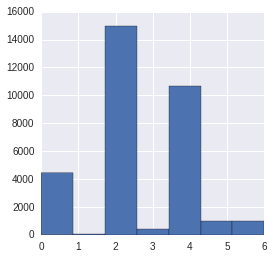

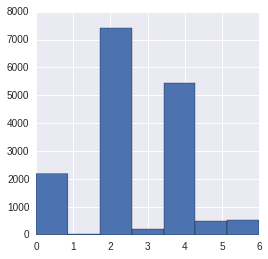

In [36]:
fig = plt.figure(figsize=(4,4), dpi=1600)
plt.hist(train['Marital.Status'], bins = len(new_marital_status_levels))

fig = plt.figure(figsize=(4,4), dpi=1600)
plt.hist(test['Marital.Status'], bins = len(new_marital_status_levels))

In [37]:
marital_level_status_decoder = dict(zip(new_marital_status_levels, marital_status_levels))
print marital_level_status_decoder

{0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}


#### Occupation

In [38]:
occupation_levels = train.Occupation.unique()
print occupation_levels

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']


In [39]:
train.Occupation = number.fit_transform(train.Occupation)
test.Occupation = number.fit_transform(test.Occupation)
new_occupation_levels = train.Occupation.unique()
new_occupation_levels

/home/anirudh/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([ 1,  4,  6, 10,  8, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [40]:
new_occupation_levels_decoder = dict(zip(new_occupation_levels,occupation_levels))
new_occupation_levels_decoder

{0: nan,
 1: 'Adm-clerical',
 2: 'Armed-Forces',
 3: 'Craft-repair',
 4: 'Exec-managerial',
 5: 'Farming-fishing',
 6: 'Handlers-cleaners',
 7: 'Machine-op-inspct',
 8: 'Other-service',
 9: 'Priv-house-serv',
 10: 'Prof-specialty',
 11: 'Protective-serv',
 12: 'Sales',
 13: 'Tech-support',
 14: 'Transport-moving'}

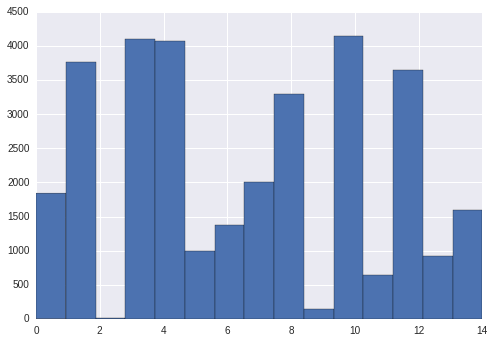

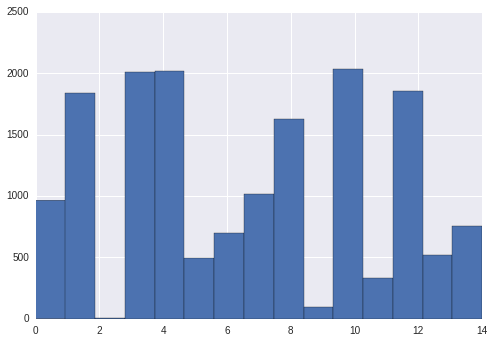

In [41]:
plt.hist(train.Occupation, bins = len(new_occupation_levels))
plt.show()

plt.hist(test.Occupation, bins = len(new_occupation_levels))
plt.show()

#### Relationshop

In [42]:
relationship_levels = train.Relationship.unique()
print relationship_levels

['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


In [43]:
train.Relationship = number.fit_transform(train.Relationship)
test.Relationship = number.fit_transform(test.Relationship)

In [44]:
new_relationship_levels = train.Relationship.unique()
relationship_levels_decoder = dict(zip(new_relationship_levels, relationship_levels))
relationship_levels_decoder

{0: 'Husband',
 1: 'Not-in-family',
 2: 'Other-relative',
 3: 'Own-child',
 4: 'Unmarried',
 5: 'Wife'}

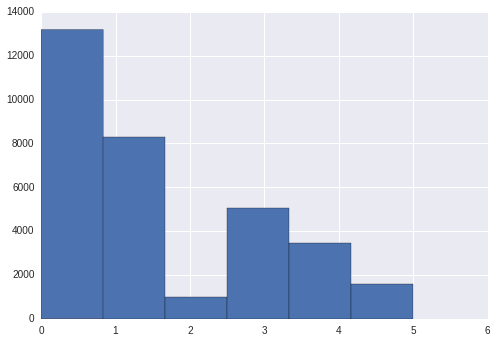

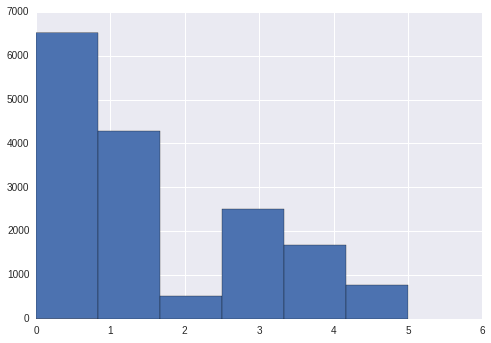

In [45]:
plt.hist(train.Relationship, bins=len(relationship_levels))
plt.show()

plt.hist(test.Relationship, bins=len(relationship_levels))
plt.show()

#### Race

In [46]:
race_levels = train.Race.unique()
print race_levels

['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


In [47]:
train.Race = number.fit_transform(train.Race)
test.Race = number.fit_transform(test.Race)
new_race_levels = train.Race.unique()
print new_race_levels

[4 2 1 0 3]


In [48]:
race_levels_decoder = dict(zip(new_race_levels,race_levels))
race_levels_decoder

{0: 'Amer-Indian-Eskimo',
 1: 'Asian-Pac-Islander',
 2: 'Black',
 3: 'Other',
 4: 'White'}

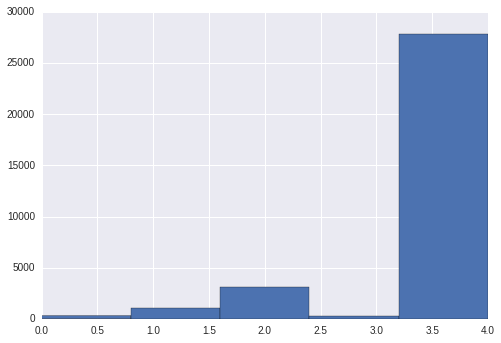

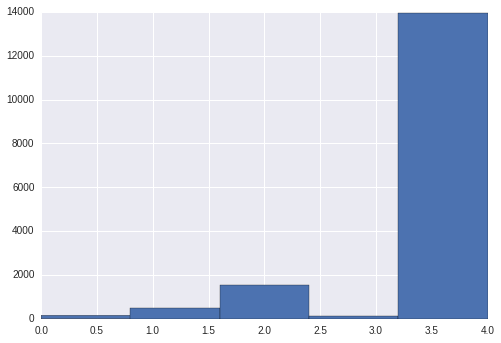

In [49]:
plt.hist(train.Race, bins = len(race_levels))
plt.show()

plt.hist(test.Race, bins = len(race_levels))
plt.show()

#### Sex

In [50]:
sex_levels = train.Sex.unique()
train.Sex = number.fit_transform(train.Sex)
test.Sex = number.fit_transform(test.Sex)
new_sex_levels = train.Sex.unique()
sex_levels_decoder = dict(zip(new_sex_levels, sex_levels))
sex_levels_decoder

{0: 'Female', 1: 'Male'}

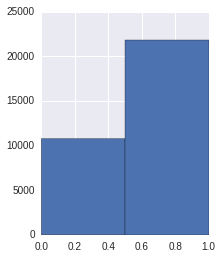

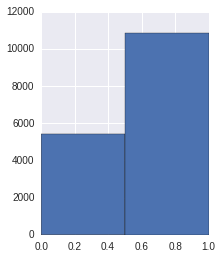

In [51]:
fig = plt.figure(figsize=(3,4), dpi=1600)
plt.hist(train.Sex, bins = 2)
plt.show()

fig = plt.figure(figsize=(3,4), dpi=1600)
plt.hist(test.Sex, bins = 2)
plt.show()

#### Native Country

In [52]:
native_country_levels = train['Native.Country'].unique()
train['Native.Country'] = number.fit_transform(train['Native.Country'])
test['Native.Country'] = number.fit_transform(test['Native.Country'])
new_native_country_levels = train['Native.Country'].unique()
native_country_levels_decoder = dict(zip(new_native_country_levels, native_country_levels))

In [53]:
native_country_levels_decoder

{0: nan,
 1: 'Cambodia',
 2: 'Canada',
 3: 'China',
 4: 'Columbia',
 5: 'Cuba',
 6: 'Dominican-Republic',
 7: 'Ecuador',
 8: 'El-Salvador',
 9: 'England',
 10: 'France',
 11: 'Germany',
 12: 'Greece',
 13: 'Guatemala',
 14: 'Haiti',
 15: 'Holand-Netherlands',
 16: 'Honduras',
 17: 'Hong',
 18: 'Hungary',
 19: 'India',
 20: 'Iran',
 21: 'Ireland',
 22: 'Italy',
 23: 'Jamaica',
 24: 'Japan',
 25: 'Laos',
 26: 'Mexico',
 27: 'Nicaragua',
 28: 'Outlying-US(Guam-USVI-etc)',
 29: 'Peru',
 30: 'Philippines',
 31: 'Poland',
 32: 'Portugal',
 33: 'Puerto-Rico',
 34: 'Scotland',
 35: 'South',
 36: 'Taiwan',
 37: 'Thailand',
 38: 'Trinadad&Tobago',
 39: 'United-States',
 40: 'Vietnam',
 41: 'Yugoslavia'}

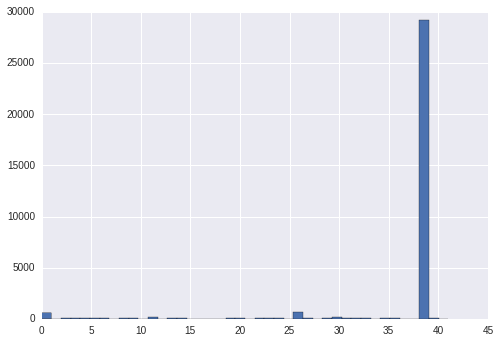

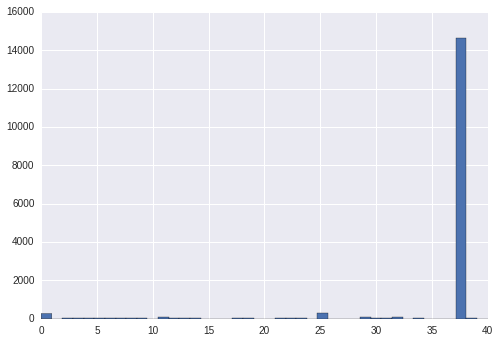

In [54]:
plt.hist(train['Native.Country'], bins = 42)
plt.show()

plt.hist(test['Native.Country'], bins = 42)
plt.show()

This feature needs binning countries together. Question is, how best to do that?

In [55]:
pprint(native_country_levels_decoder)

{0: nan,
 1: 'Cambodia',
 2: 'Canada',
 3: 'China',
 4: 'Columbia',
 5: 'Cuba',
 6: 'Dominican-Republic',
 7: 'Ecuador',
 8: 'El-Salvador',
 9: 'England',
 10: 'France',
 11: 'Germany',
 12: 'Greece',
 13: 'Guatemala',
 14: 'Haiti',
 15: 'Holand-Netherlands',
 16: 'Honduras',
 17: 'Hong',
 18: 'Hungary',
 19: 'India',
 20: 'Iran',
 21: 'Ireland',
 22: 'Italy',
 23: 'Jamaica',
 24: 'Japan',
 25: 'Laos',
 26: 'Mexico',
 27: 'Nicaragua',
 28: 'Outlying-US(Guam-USVI-etc)',
 29: 'Peru',
 30: 'Philippines',
 31: 'Poland',
 32: 'Portugal',
 33: 'Puerto-Rico',
 34: 'Scotland',
 35: 'South',
 36: 'Taiwan',
 37: 'Thailand',
 38: 'Trinadad&Tobago',
 39: 'United-States',
 40: 'Vietnam',
 41: 'Yugoslavia'}


##### Count the number of data points per country

In [56]:
country_observations_count_train = [len(train[train['Native.Country'] == i]) for i in range(42)]
country_observations_count_test = [len(test[test['Native.Country'] == i]) for i in range(42)]

print dict(zip([native_country_levels_decoder[i] for i in range(42)],country_observations_count_train))
print dict(zip([native_country_levels_decoder[i] for i in range(42)],country_observations_count_test))

{nan: 583, 'Canada': 121, 'Hong': 20, 'Dominican-Republic': 70, 'Italy': 73, 'Peru': 31, 'Outlying-US(Guam-USVI-etc)': 14, 'Scotland': 12, 'Cambodia': 19, 'France': 29, 'Ireland': 24, 'Laos': 18, 'Thailand': 18, 'Ecuador': 28, 'Columbia': 59, 'Cuba': 95, 'Guatemala': 64, 'China': 75, 'Germany': 137, 'Haiti': 44, 'Poland': 60, 'United-States': 29170, 'Philippines': 198, 'Vietnam': 67, 'Japan': 62, 'Iran': 43, 'Honduras': 13, 'South': 80, 'Jamaica': 81, 'England': 90, 'Portugal': 37, 'Mexico': 643, 'El-Salvador': 106, 'India': 100, 'Puerto-Rico': 114, 'Yugoslavia': 16, 'Holand-Netherlands': 1, 'Trinadad&Tobago': 19, 'Greece': 29, 'Hungary': 13, 'Taiwan': 51, 'Nicaragua': 34}
{nan: 274, 'Canada': 61, 'Hong': 6, 'Dominican-Republic': 33, 'Italy': 25, 'Peru': 97, 'Outlying-US(Guam-USVI-etc)': 15, 'Scotland': 35, 'Cambodia': 9, 'France': 9, 'Ireland': 32, 'Laos': 308, 'Thailand': 8, 'Ecuador': 17, 'Columbia': 26, 'Cuba': 43, 'Guatemala': 24, 'China': 47, 'Germany': 69, 'Haiti': 31, 'Poland':

#### let's not over_complicate. Let's club this as 2 bins. One for US and other non-US

In [57]:
country_list = [0]*len(train['Native.Country'])
US_index = list(train[train['Native.Country'] == 39].index)
for i in US_index: country_list[i] = 1
train['Native.Country'] = country_list

country_list = [0]*len(test['Native.Country'])
US_index = list(test[test['Native.Country'] == 39].index)
for i in US_index: country_list[i] = 1
test['Native.Country'] = country_list

In [58]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,2,1,4,7,3,2,1,40,0
1,32563,38,2,2,2,5,0,4,1,50,0
2,32564,28,0,5,2,11,0,4,1,40,0
3,32565,44,2,3,2,7,0,2,1,40,0
4,32566,18,1,3,4,0,3,4,0,30,0


# Multivariate Analysis

In [59]:
sex_income_crosstab = pd.crosstab(train.Sex, train['Income.Group'], margins = True)
print sex_income_crosstab

Income.Group      0     1    All
Sex                             
0              9592  1179  10771
1             15128  6662  21790
All           24720  7841  32561


In [60]:
sex_income_crosstab.iloc[:-1,:-1]

Income.Group,0,1
Sex,,
0,9592,1179
1,15128,6662


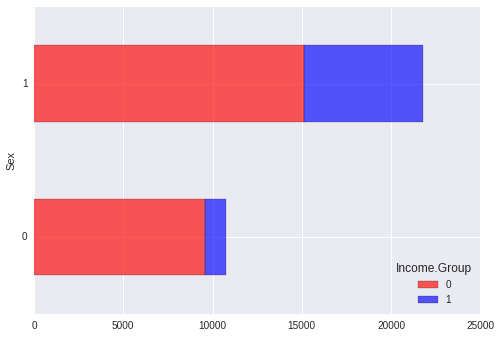

In [61]:
fig = plt.figure(figsize=(6,6), dpi=1600)
# fig, ax = plt.subplots()
sex_income_crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)

In [62]:
sex_income_crosstab

Income.Group,0,1,All
Sex,,,
0,9592,1179,10771
1,15128,6662,21790
All,24720,7841,32561


In [63]:
def percentConvert(x):
    return x / float(x[-1])

sex_income_crosstab.apply(percentConvert, axis = 0)

Income.Group,0,1,All
Sex,,,
0,0.388026,0.150363,0.330795
1,0.611974,0.849637,0.669205
All,1.000000,1.000000,1.000000


In [64]:
sex_income_crosstab.apply(percentConvert, axis = 1)

Income.Group,0,1,All
Sex,,,
0,0.890539,0.109461,1.0
1,0.694263,0.305737,1.0
All,0.759190,0.240810,1.0


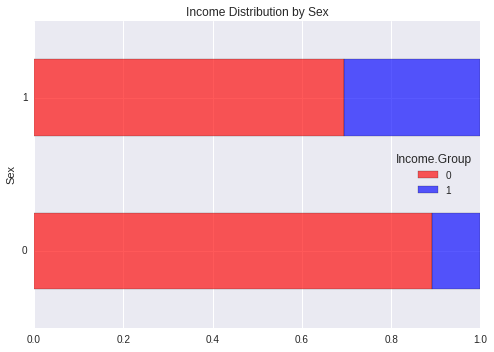

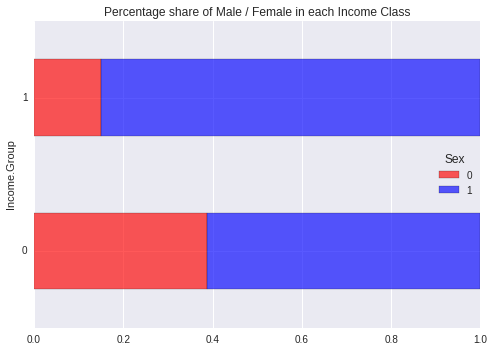

In [65]:
plt.figure(figsize=(6,10), dpi=1600)

sex_income_crosstab.apply(percentConvert, axis = 1).iloc[:-1,:-1].plot(kind='barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.title('Income Distribution by Sex')
plt.show()


sex_income_crosstab.apply(percentConvert, axis = 0).iloc[:-1,:-1].transpose().plot(kind='barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.title('Percentage share of Male / Female in each Income Class')
plt.show()

/home/anirudh/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


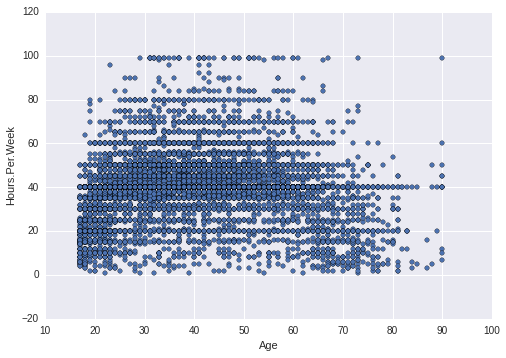

In [66]:
test.plot('Age', 'Hours.Per.Week', kind = 'scatter')

This shows no real relationship between Age and Hours-Per-Week. Even intuitively we were not expecting any specific trend so this is good. In other cases, you might figure out interesting trends which can be exploited.

In [67]:
train[train.Age > 40]['Income.Group'].mean()

0.3535669121475861

Let's see how income classification changes solely based on age

In [68]:
ages = []
high_income_proportion = []
for age in range(17,91,3):
    ages.append(age)
    high_income_proportion.append(train[train.Age > age]['Income.Group'].mean())

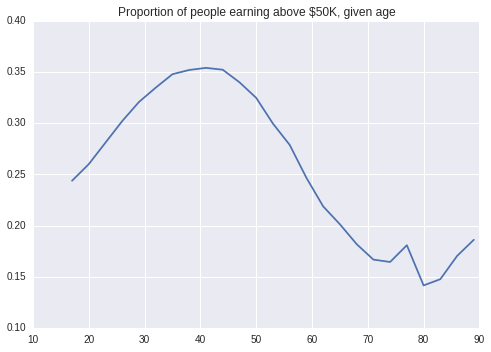

In [69]:
plt.plot(ages, high_income_proportion)
plt.title('Proportion of people earning above $50K, given age')

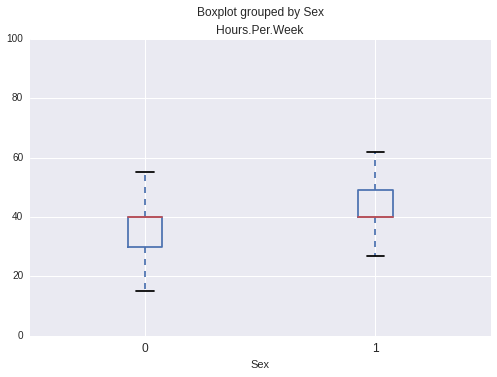

In [70]:
train.boxplot(column='Hours.Per.Week', by= 'Sex')

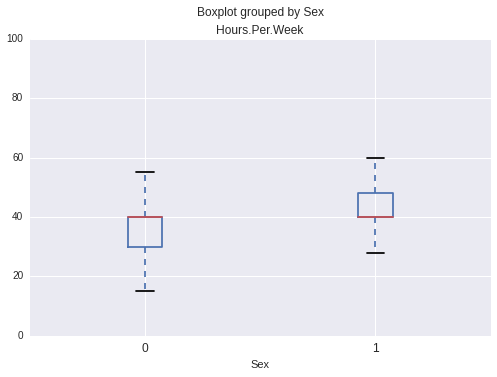

In [71]:
test.boxplot(column='Hours.Per.Week', by= 'Sex')

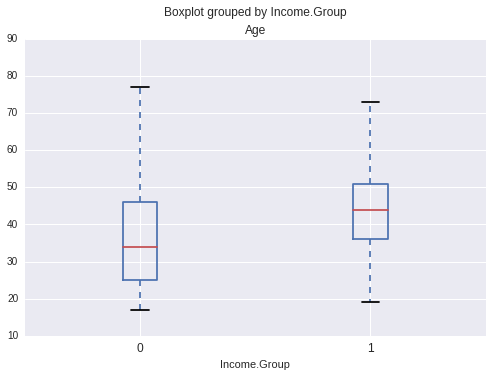

In [72]:
train.boxplot(column = 'Age', by = 'Income.Group')

What is the percentage of males which have income <= 50K ?

In [73]:
1 - train[train.Sex == 1]['Income.Group'].mean()

0.6942634235888022

# Missing Value Treatment

Checking Missing Values

In [74]:
train.apply(lambda x: x.isnull().sum())

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

Oh it looks like I fucked up on the missing values, clubbing them randomly in various categories and losing model explanatory power

# Predictive Modelling

### Model I - Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
# define the predictors

dependent_variable = 'Income.Group'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

print independent_variable

# Inititate the algorithm
model_01 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features= 'sqrt')

# Fit the algorithm
model_01.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_01_predictions = model_01.predict(test[independent_variable])

# Make submission
submission = pd.read_csv('sample_submission.csv')
submission.ID = test.ID
income_group = ['<=50K']*len(test['ID'])
for i in range(len(model_01_predictions)):
    if model_01_predictions[i] == 1: 
        income_group[i] = '>50K'        
submission['Income.Group'] = income_group
submission.to_csv('submission_01.csv', index = False)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


Your score for this submission is : 0.826976229961.

### Model II - Decision Tree Classifier with reduced number of features

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
# define the predictors

dependent_variable = 'Income.Group'
independent_variable = ['Age', 'Education', 'Workclass', 'Sex', 'Hours.Per.Week']

print independent_variable

# Inititate the algorithm
model_02 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 100, max_features= 'sqrt')

# Fit the algorithm
model_02.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_02_predictions = model_02.predict(test[independent_variable])

submission = pd.read_csv('sample_submission.csv')
submission.ID = test.ID
income_group = ['<=50K']*len(test['ID'])

for i in range(len(model_02_predictions)):
    if model_02_predictions[i] == 1: 
        income_group[i] = '>50K'
        
submission['Income.Group'] = income_group

submission.to_csv('submission_02.csv', index = False)

['Age', 'Education', 'Workclass', 'Sex', 'Hours.Per.Week']


Your score for this submission is : 0.806522940851.

### Model III - Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
dependent_variable = 'Income.Group'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

# Inititate the algorithm
model_03 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 10, max_features= 'auto')

# Fit the algorithm
model_03.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_03_predictions = model_03.predict(test[independent_variable])

# Make submission
submission = pd.read_csv('sample_submission.csv')
submission.ID = test.ID
income_group = ['<=50K']*len(test['ID'])
for i in range(len(model_03_predictions)):
    if model_03_predictions[i] == 1: 
        income_group[i] = '>50K'        
submission['Income.Group'] = income_group
submission.to_csv('submission_03.csv', index = False)

Your score for this submission is : 0.8359437381.

### Model IV - K Nearest Neighbors Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
dependent_variable = 'Income.Group'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

# Inititate the algorithm
model_04 = KNeighborsClassifier(n_neighbors=10, leaf_size=1)

# Fit the algorithm
model_04.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_04_predictions = model_04.predict(test[independent_variable])

# Make submission
submission = pd.read_csv('sample_submission.csv')
submission.ID = test.ID
income_group = ['<=50K']*len(test['ID'])
for i in range(len(model_04_predictions)):
    if model_04_predictions[i] == 1: 
        income_group[i] = '>50K'        
submission['Income.Group'] = income_group
submission.to_csv('submission_04.csv', index = False)

Your score for this submission is : 0.811313801364.